In [2]:
%load_ext autoreload
%autoreload 2

import sys
if sys.path[-1] != "..": sys.path.append("..")

from Source.qBN.qBNMC import qBayesNet
from Source.qBN.qBNInference import qInference
from Source.qBN.qBNRT import qRuntime


import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [41]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='1b6910ff55c1d3853e5c8e2ca2b0dbbc3b415fb897d26a6c272c63254527581c824aea1180585f706ab8263318f3c553549d136ca32952ef401abb54011eee33'
)

backend = service.get_backend("ibm_brisbane")

# Or save your credentials on disk.
# QiskitRuntimeService.save_account(channel='ibm_quantum', instance='ibm-q/open/main', token='1b6910ff55c1d3853e5c8e2ca2b0dbbc3b415fb897d26a6c272c63254527581c824aea1180585f706ab8263318f3c553549d136ca32952ef401abb54011eee33')

In [90]:
bn=gum.fastBN("a->b->c->h;i->h;a->d->c;g->f->e;d->e")
bn

(pyAgrum.BayesNet<double>@0x62f06d0e2680) BN{nodes: 9, arcs: 9, domainSize: 512, dim: 21, mem: 336o}

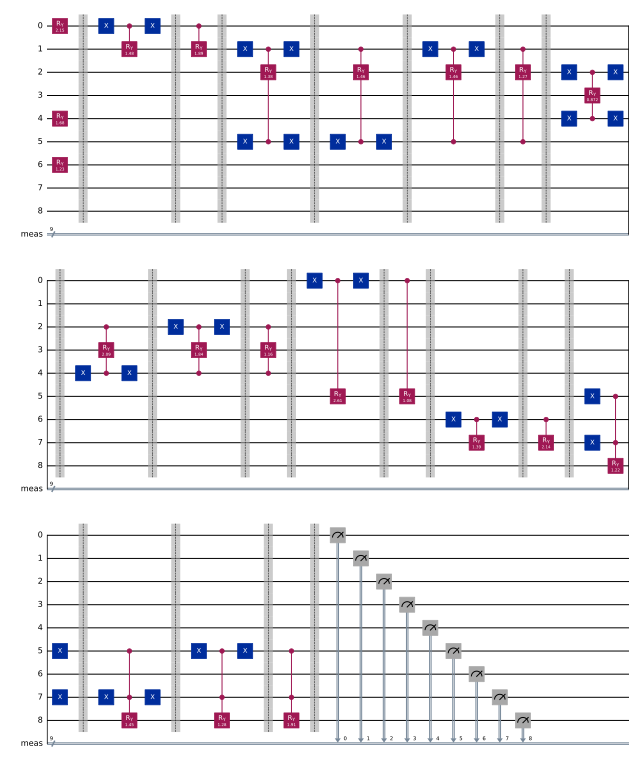

In [91]:
qbn = qBayesNet(bn)
qc = qbn.buildCircuit(add_measure=True)
qc.draw(output="mpl", scale=0.5)

In [92]:
evidence = {"a":0, "c":1}

In [94]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

ie=gum.LazyPropagation(bn)
ie.setEvidence(evidence)
ie.makeInference()
print(f"Evidence: {evidence}")
print(f"Evidence probability: {ie.evidenceProbability()}")
ie.posterior("b")

Evidence: {'a': 0, 'c': 1}
Evidence probability: 0.09194788333691056


(pyAgrum.Potential<double>@0x62f06c0082a0) 
  b                |
0        |1        |
---------|---------|
 0.5948  | 0.4052  |

In [95]:
qinf = qInference(qbn)
qinf.setEvidence(evidence)
qinf.setMaxIter(5000)
qinf.useFragmentBN(target={"b"})
qinf.qbn.bn

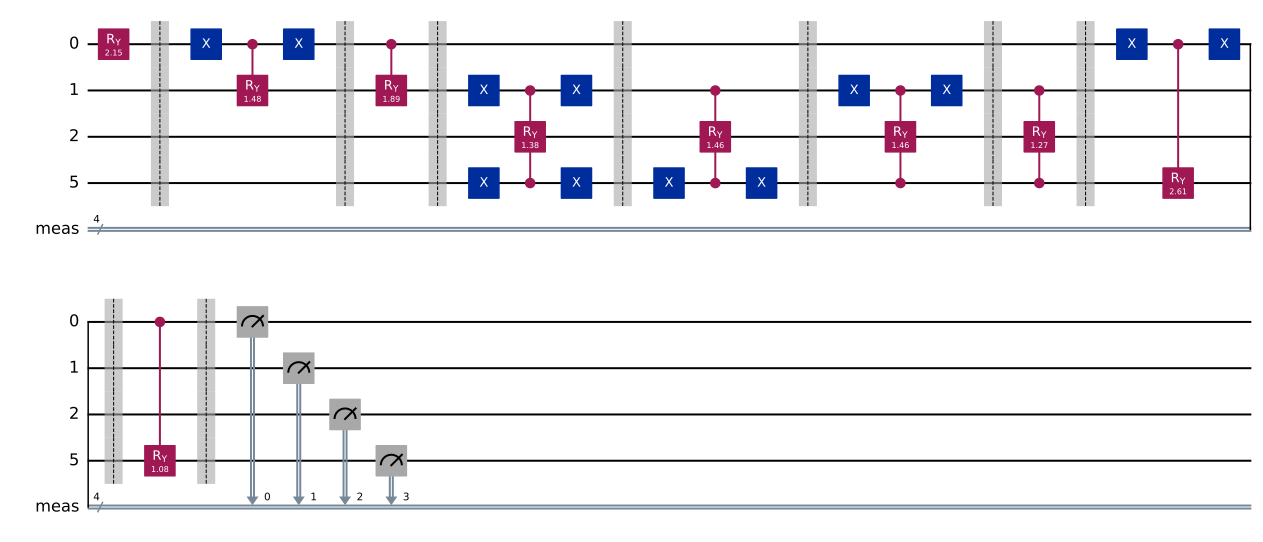

In [96]:
qc = qinf.qbn.buildCircuit()
qc.draw(output='mpl')

In [97]:
qinf.makeInference()

In [98]:
qinf.posterior("b")

(pyAgrum.Potential<double>@0x62f06d611e70) 
  b                |
0        |1        |
---------|---------|
 0.5280  | 0.4720  |

In [99]:
qrt = qRuntime(qinf, backend)

In [100]:
qrt.getGateExecutionTime()
print(f"q-Inference log: {qrt.qinf.log}")
qrt.rejectionSamplingRuntime()

A gate transpiled circuit depth: 1005
A gate execution time: 0.00029312 s
G gate transpiled circuit depth: 1015
G gate execution time: 0.00029336 s
q-Inference log: {'A': 6614, 'G': 6614}


3.87897872